In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import igraph
import seaborn
###import packages
from scEasyMode import mousefilter
from scEasyMode import clusterplot
from scEasyMode import pymulti
from scEasyMode import sceasy

### define files needed for multiseq processing

In [2]:
####define files
R1 = '../multi_raw/L0027_R1.fastq.gz'
R2 = '../multi_raw/L0027_R2.fastq.gz'
####define metadata
v10x = 'v3.1'
expname = 'BGday6_'
sampname = 'BGday6_'
####define length of sequences
len_10x = 16
len_umi = 12
len_multi = 8
####define multiseq barcodes file
bcfile = '../multi_raw/LMOlist_L0027.csv'
bcsmulti = pd.read_csv(bcfile,sep=',',index_col=1,header=None)
bcsmulti.columns = ['multi']
bcsmulti = bcsmulti['multi'].tolist()
####define 10x barcodes whitelist
bc10xfile = '../multi_raw/barcodes.tsv'
bcs10x = pd.read_csv(bc10xfile,sep='\t',header=None)
bcs10x['10x'] = bcs10x.apply(lambda row: row[0][:-2],axis=1)
bcs10x = bcs10x['10x'].tolist()

### run multiseq processing

Multiseq rate is:  85.10412205688921
10X Cell Barcode rate is:  20.37448208869417
Duplication rate is:  5.69871421136442


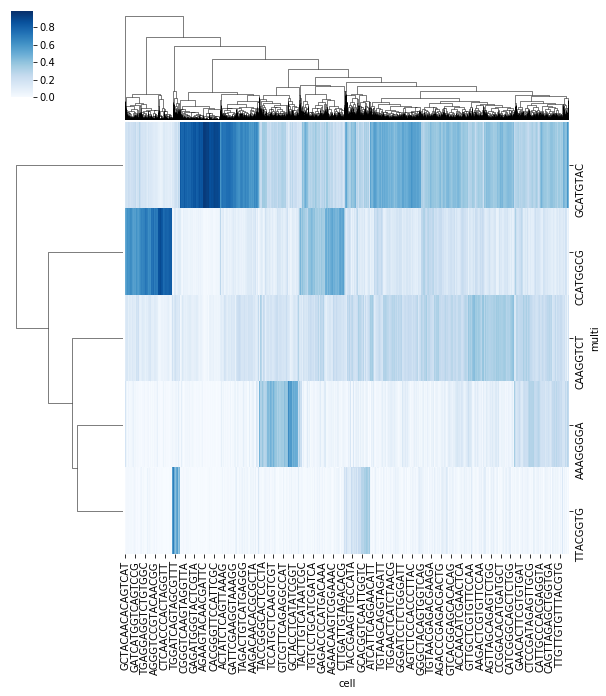

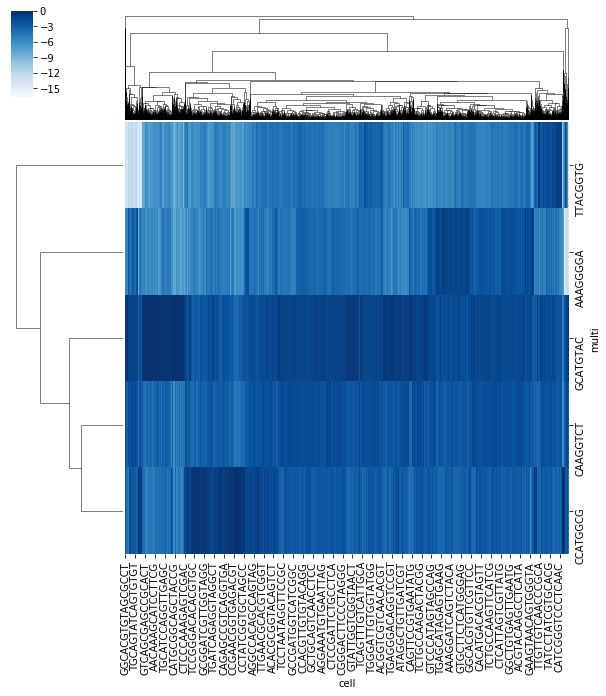

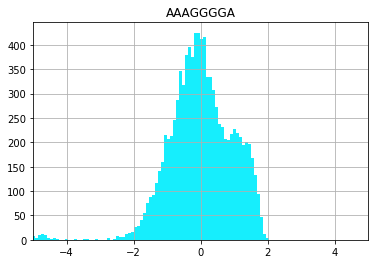

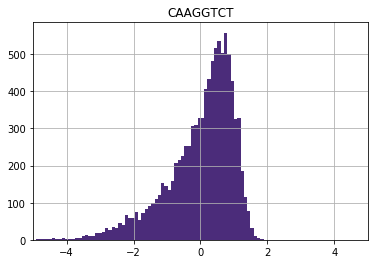

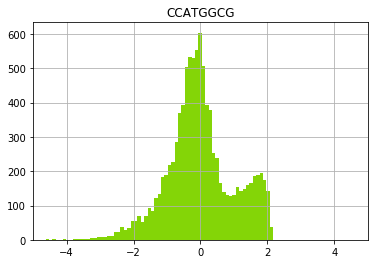

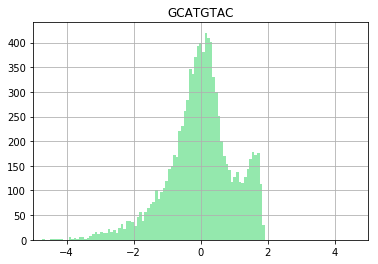

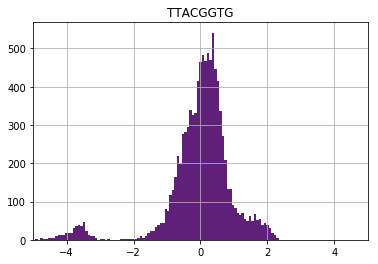

In [3]:
pymulti.pymulti(R1,R2,bcsmulti,bcs10x,split=True)

### split out mouse cells and human cells from data

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


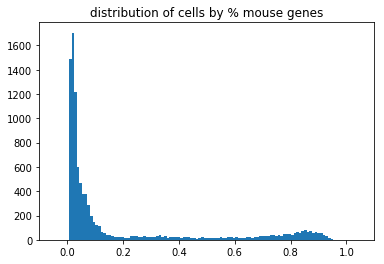

Trying to set attribute `.var` of view, making a copy.
... storing 'feature_types' as categorical
Trying to set attribute `.var` of view, making a copy.
... storing 'genome' as categorical
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.var` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'feature_types' as categorical
Trying to set attribute `.var` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'genome' as categorical


(1606, 54232)
(6888, 33538)


In [4]:
file1 = 'filtered_feature_bc_mm10hg19_matrix.h5'
file2 = 'filtered_feature_bc_hg38_matrix.h5'
mouse,human = mousefilter.main(file1,file2)
print(mouse.shape)
print(human.shape)

# overlay metadata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'call' as categorical
... storing 'sample' as categorical


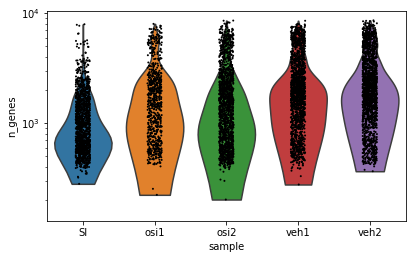

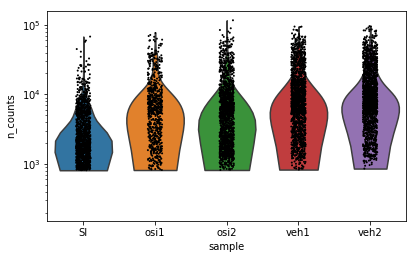

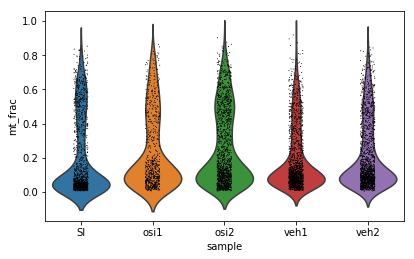

plotting mt_frac below.


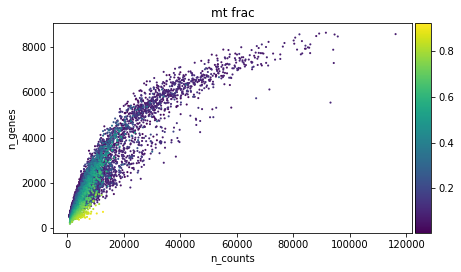

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


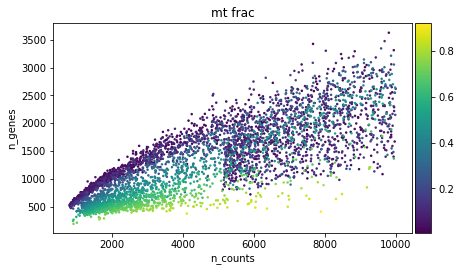

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


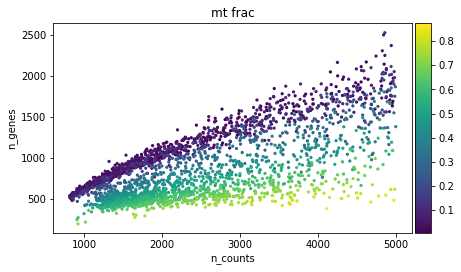

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


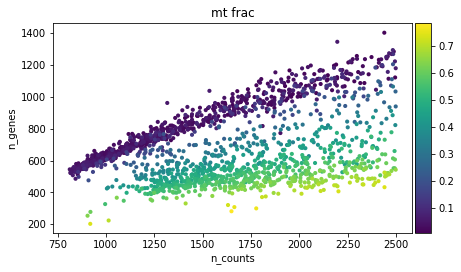

plotting sample below.


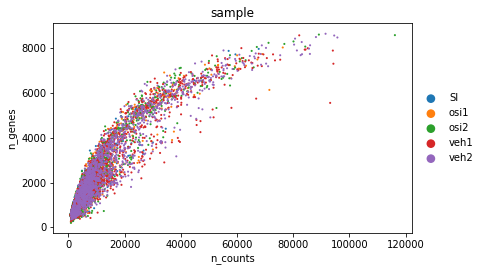

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


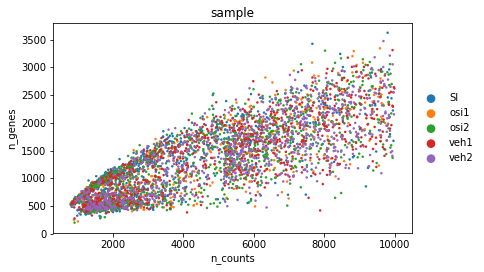

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


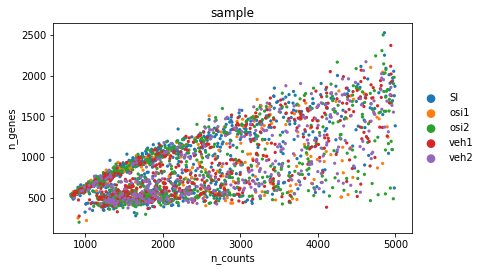

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


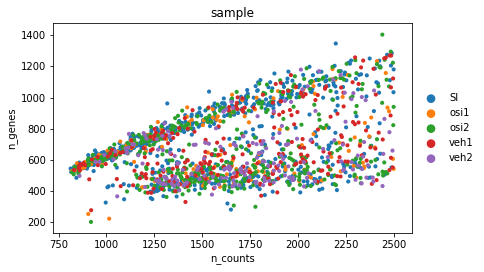

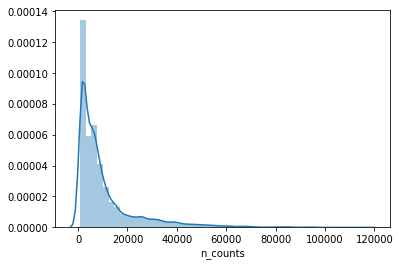

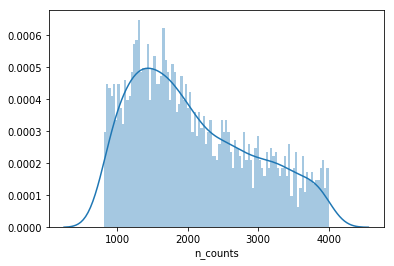

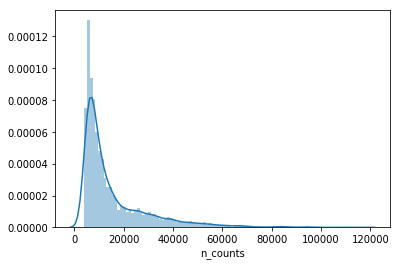

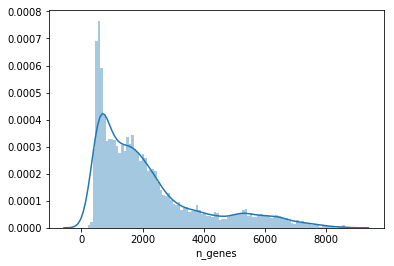

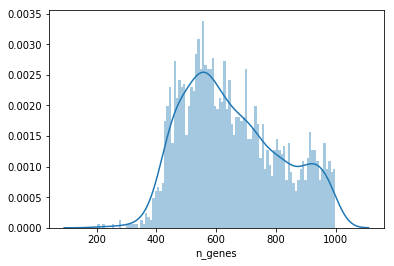

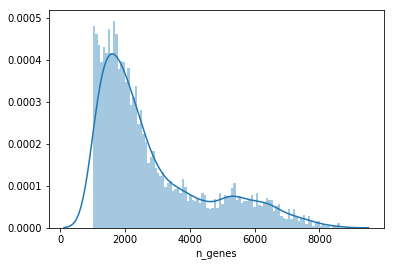

<Figure size 432x288 with 0 Axes>

In [5]:
###read in data by species
human = sceasy.read_species(human=True)
###overlay metadata
human = sceasy.overlay_meta(human,bcfile)
###qc
human = sceasy.qc_all(human)

Trying to set attribute `.obs` of view, making a copy.


Total number of cells: 5854
Number of cells after min count filter: 5854


Trying to set attribute `.obs` of view, making a copy.


Number of cells after max count filter: 5854
Number of cells after MT filter: 4107
Number of cells after gene filter: 4107
Total number of genes: 33538
Number of genes after cell filter: 14888
Total number of genes: 33538
Number of genes after cell filter: 14556

 Number of highly variable genes: 2999


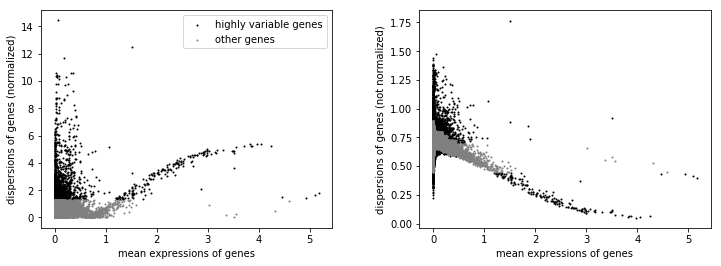


 Number of highly variable genes: 2999


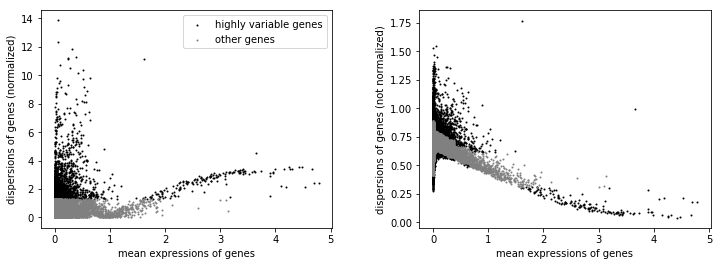

(5854, 14888)
(4107, 14556)


In [6]:
###filtering by cells by parameters
##define
mt_thresh = 0.8
min_cells = 20
sig_pct = 15
##filter
human,clean = sceasy.filters(human,mt_thresh,min_cells,sig_pct)

# visualize

... storing 'phase' as categorical


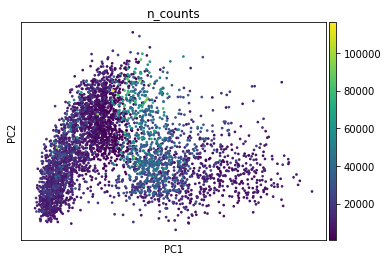

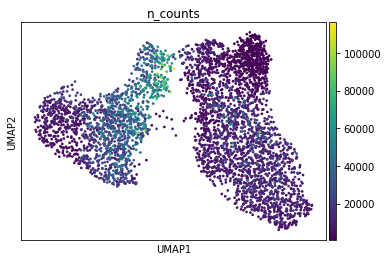

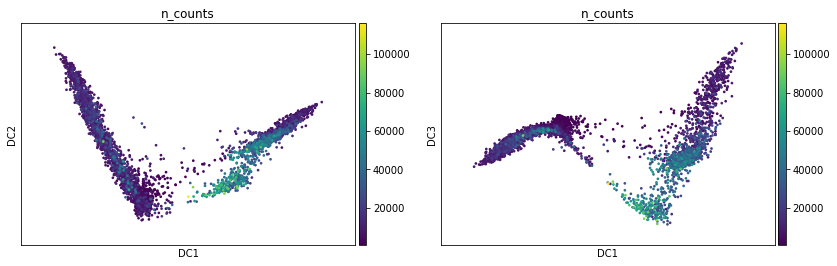

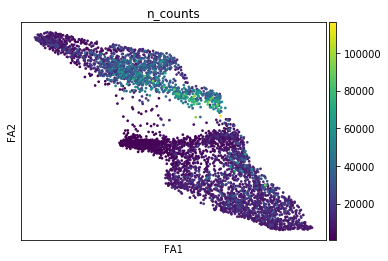

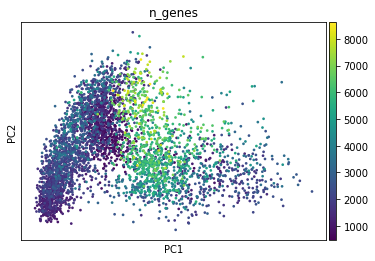

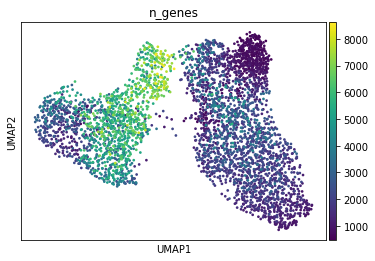

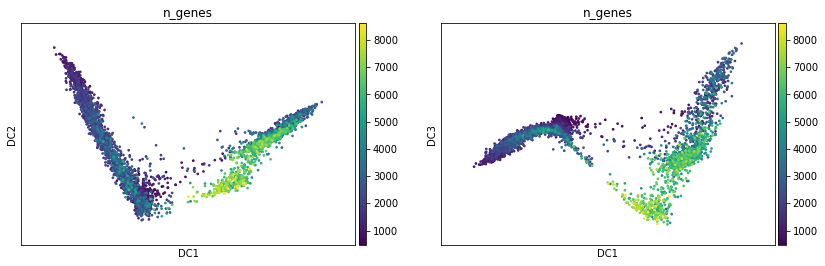

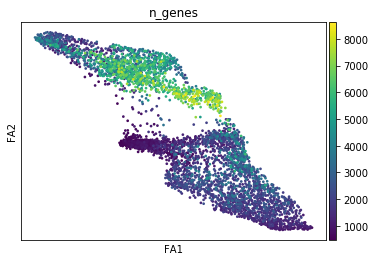

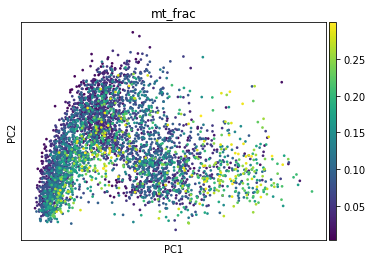

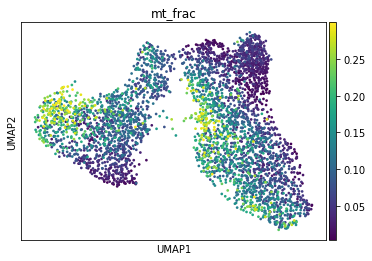

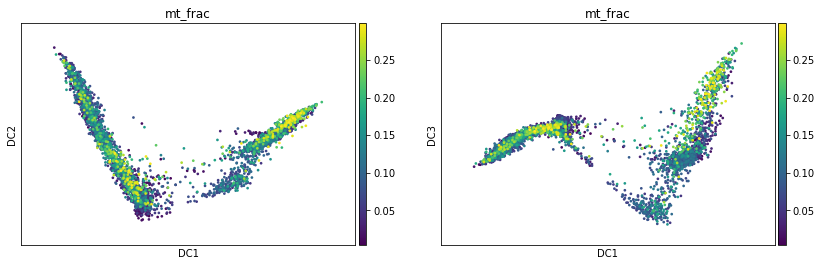

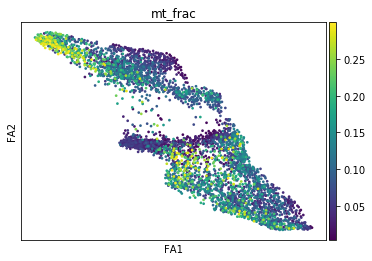

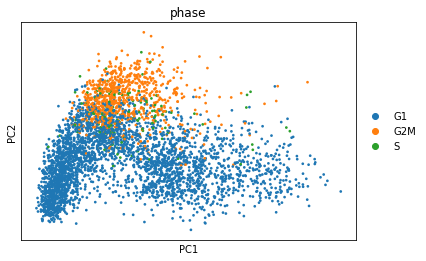

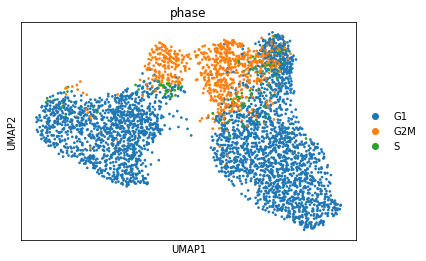

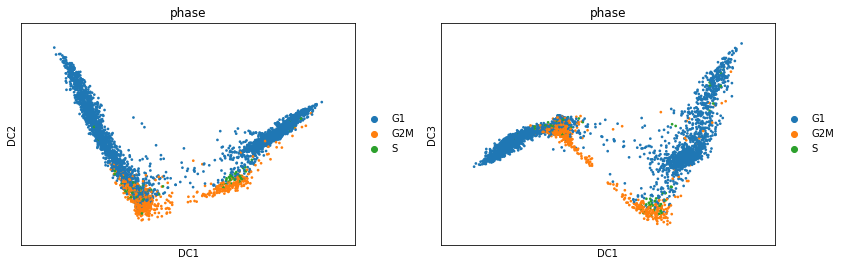

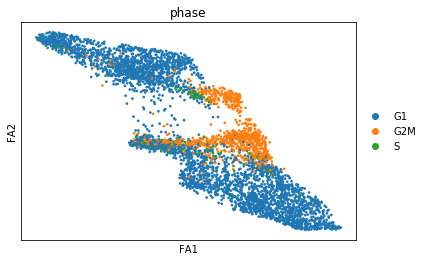

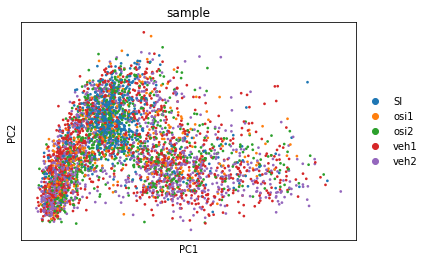

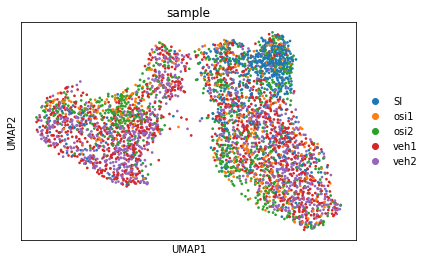

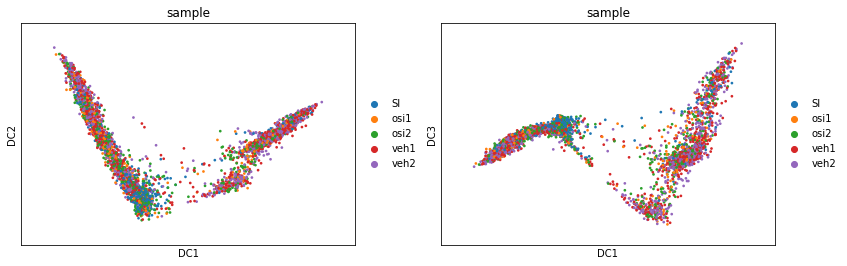

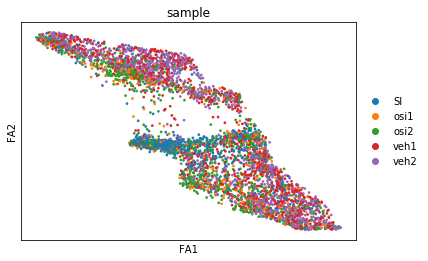

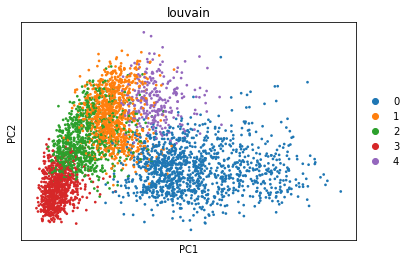

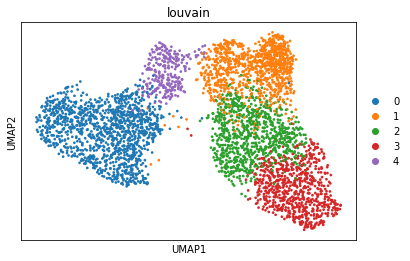

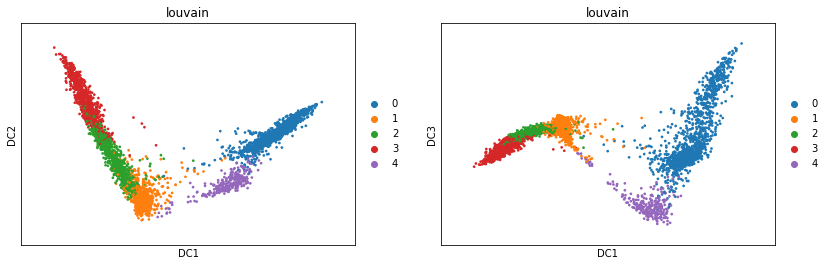

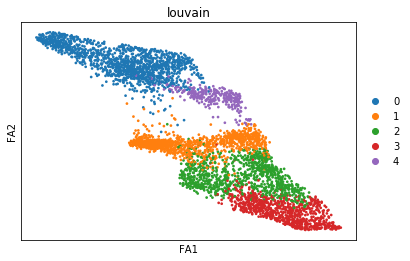

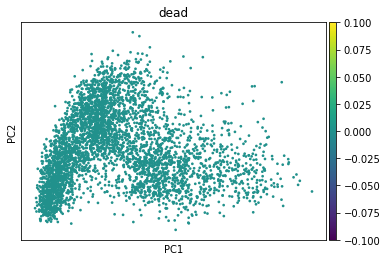

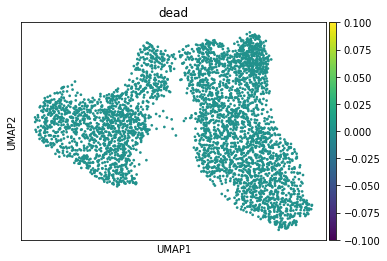

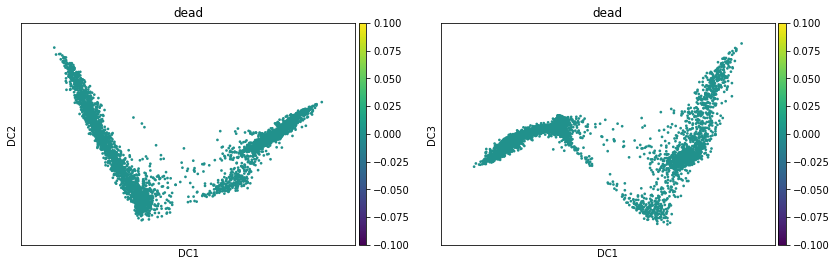

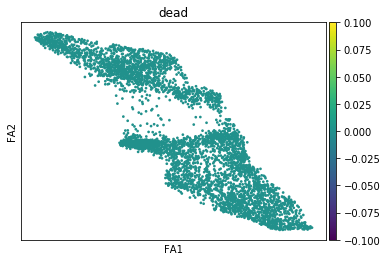

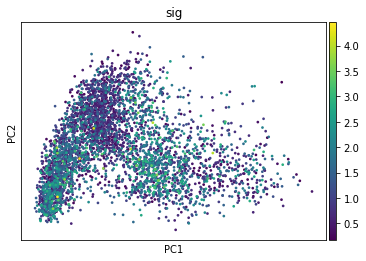

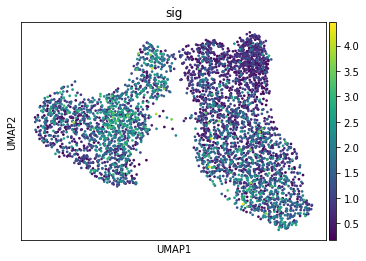

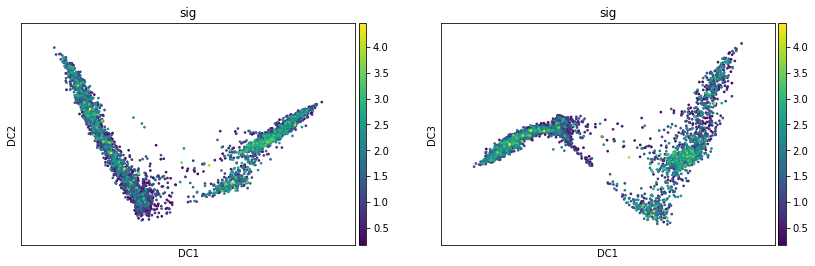

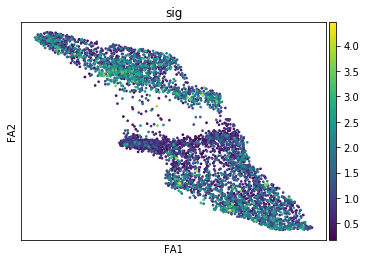

In [7]:
##visualize
clean = sceasy.visualize(clean)

# stack clusters by covariates

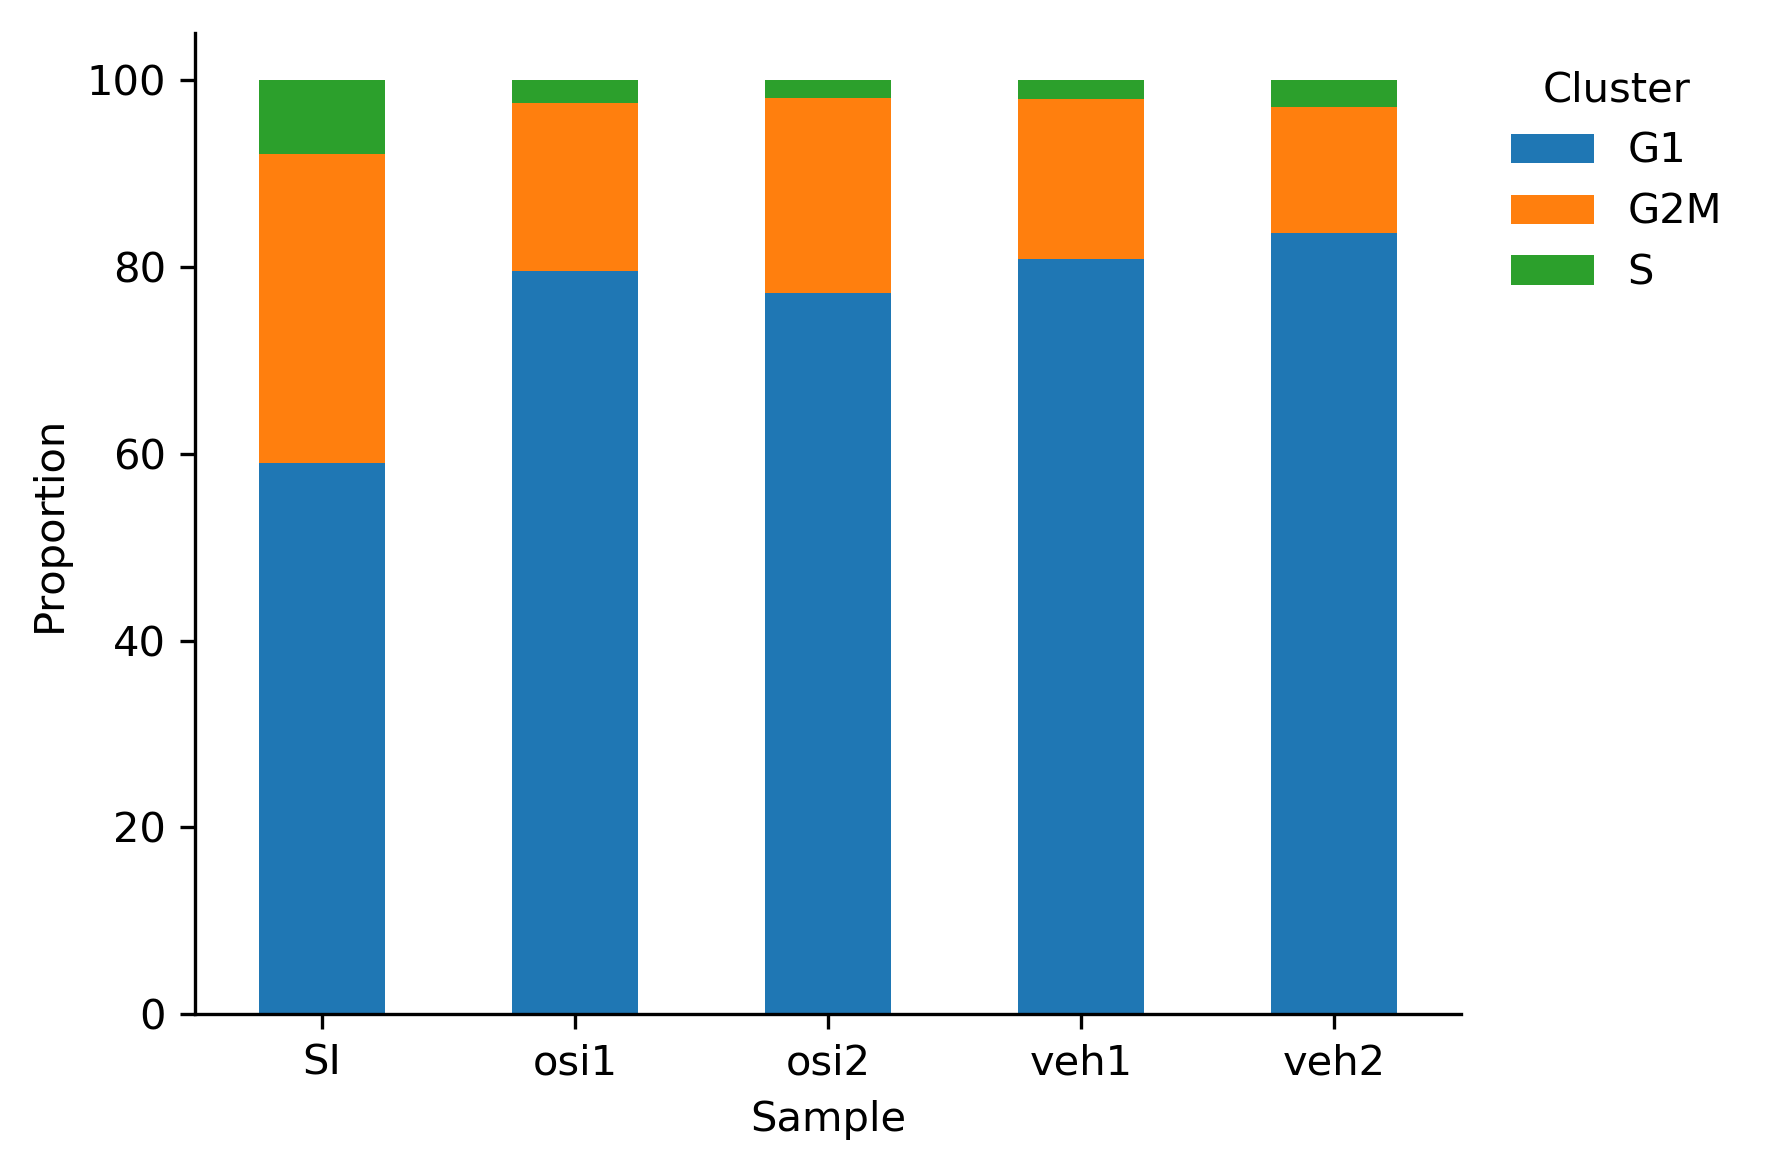

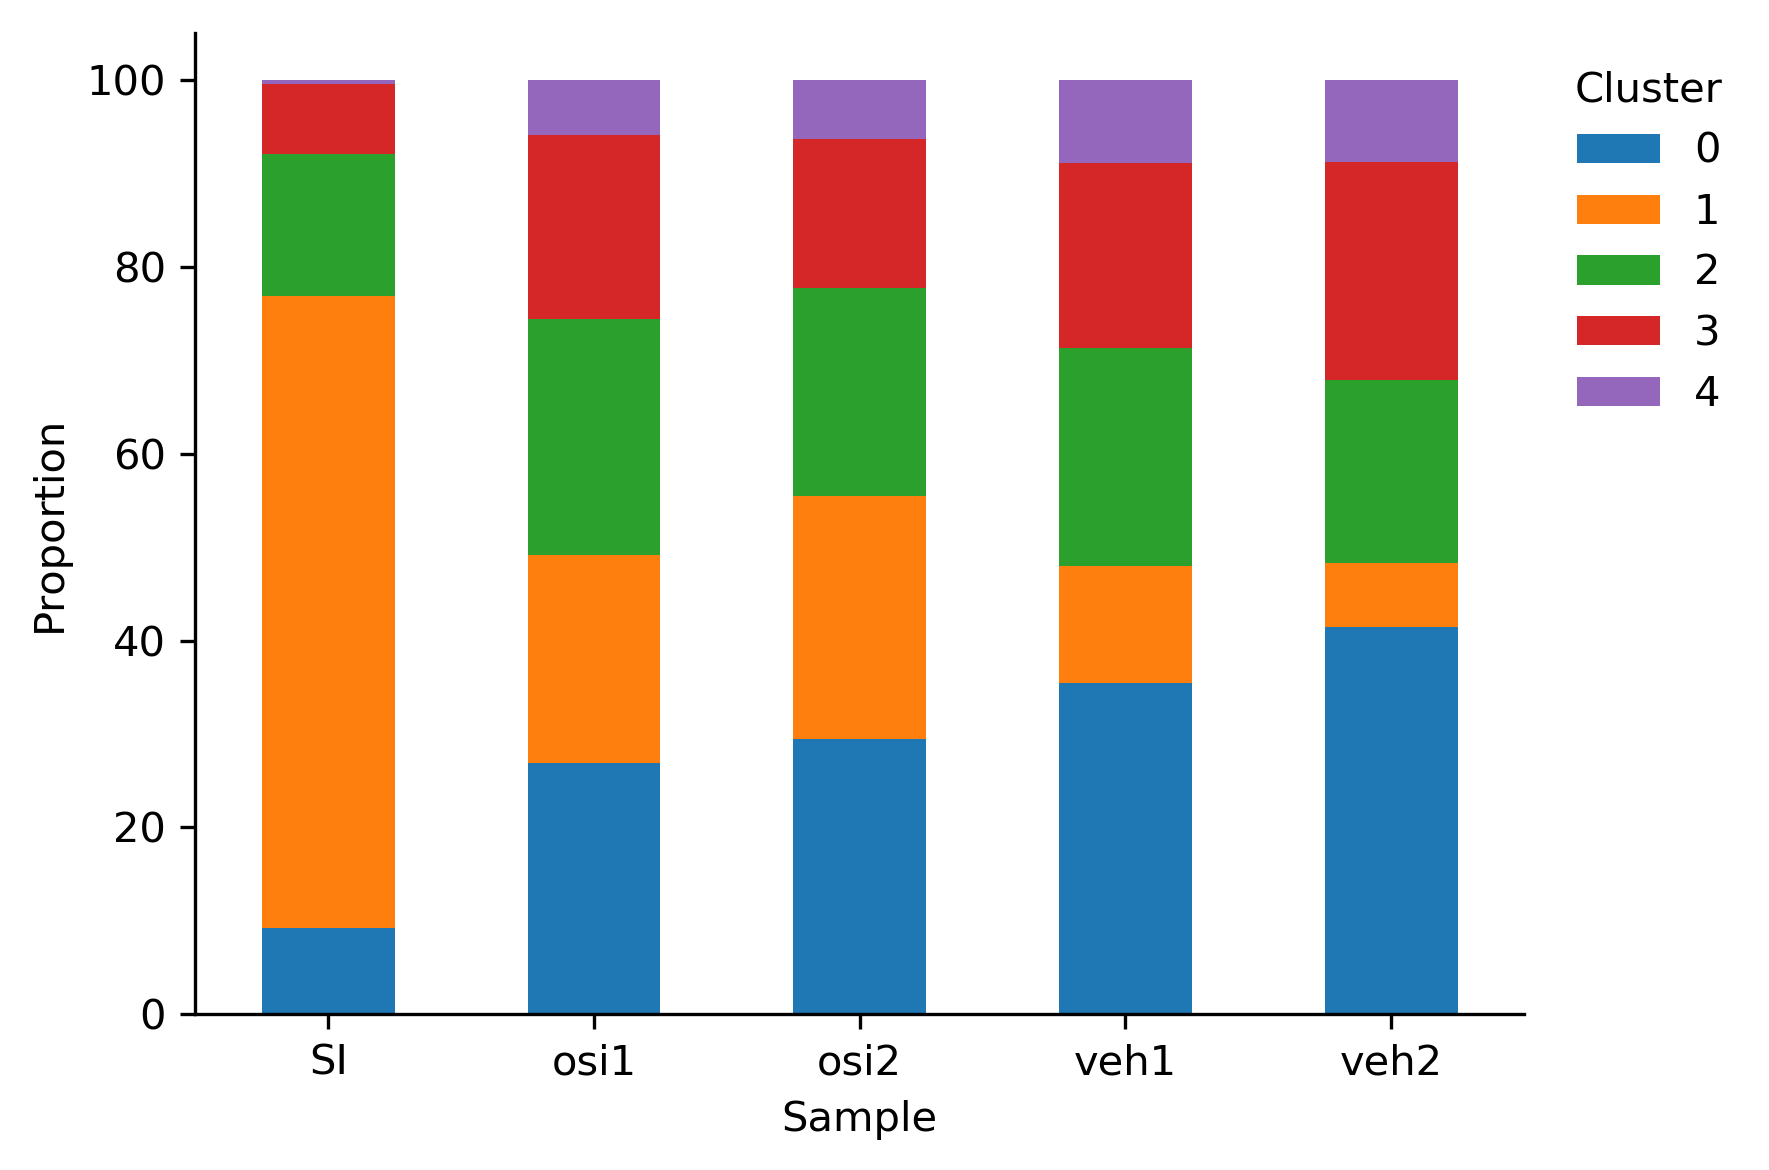

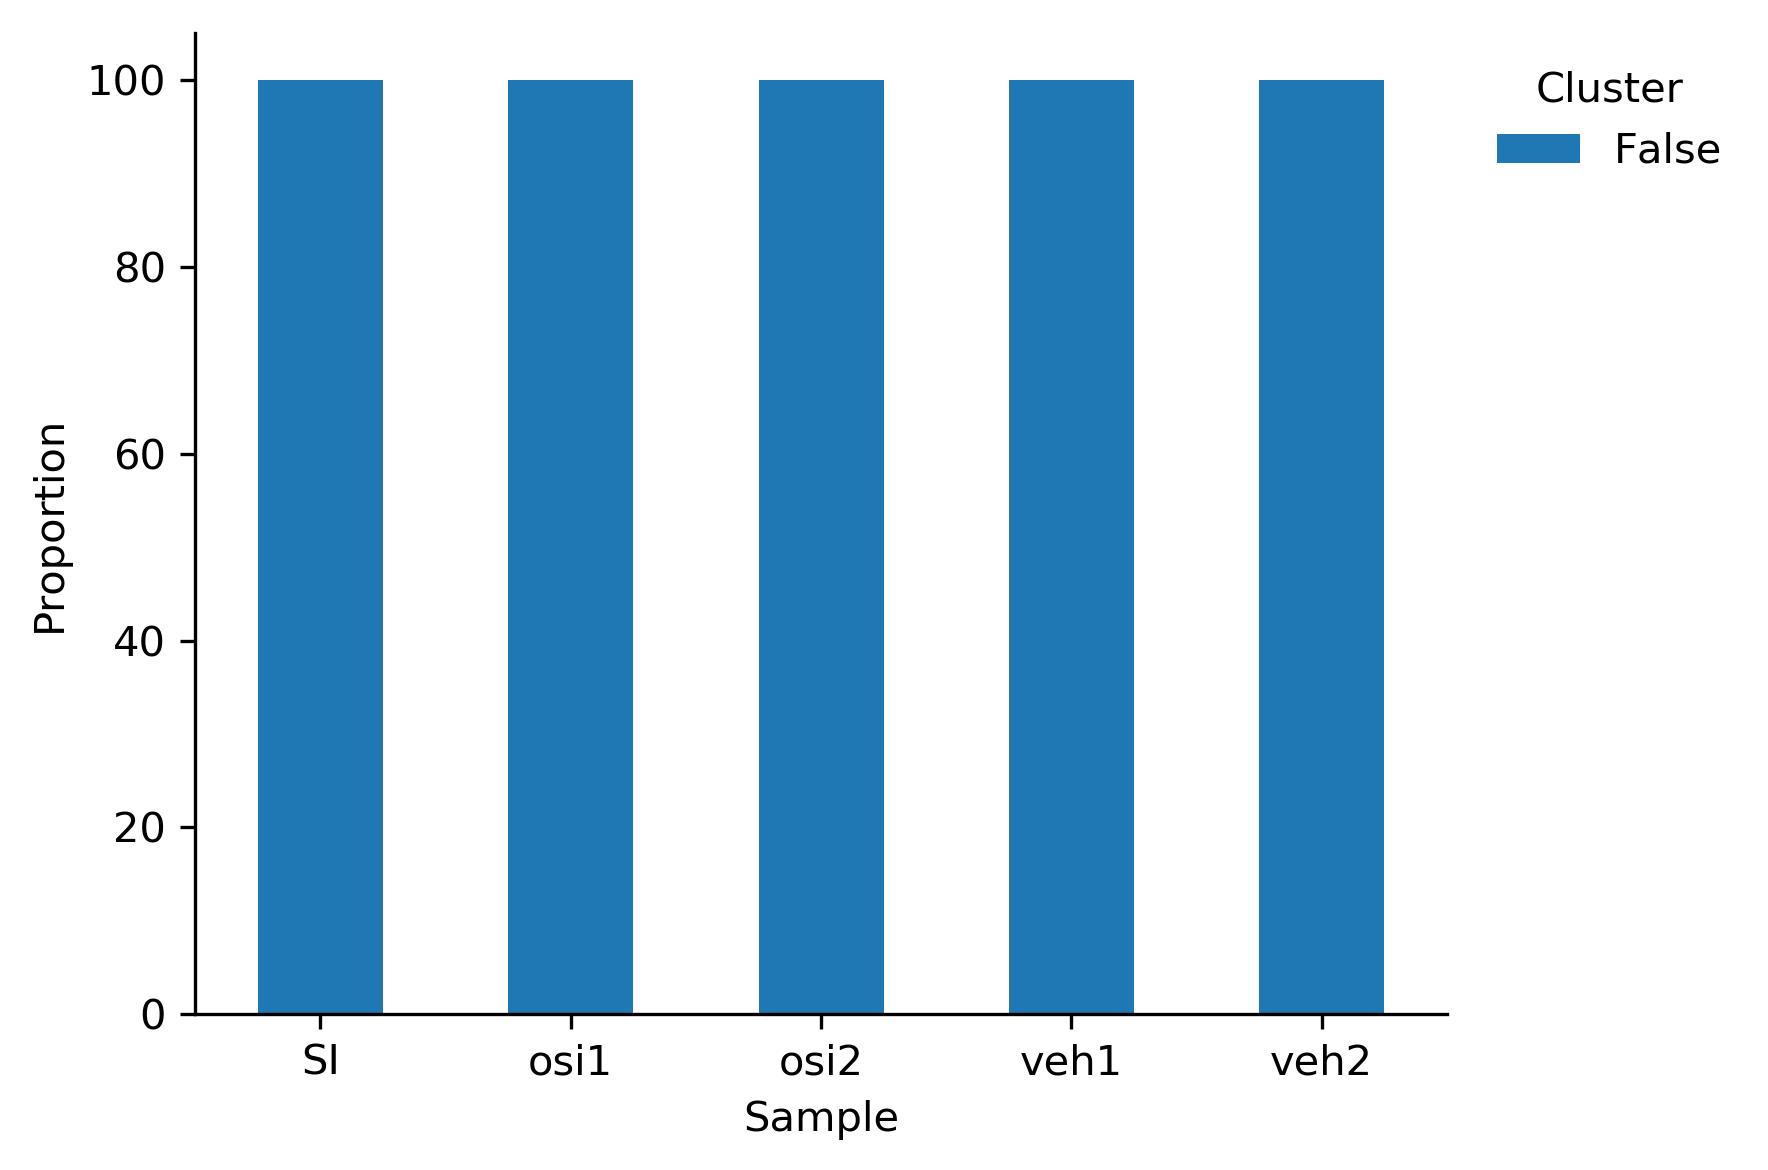

In [8]:
###get clusterplots
clusterplot.plot(clean)

# visualize density by sample

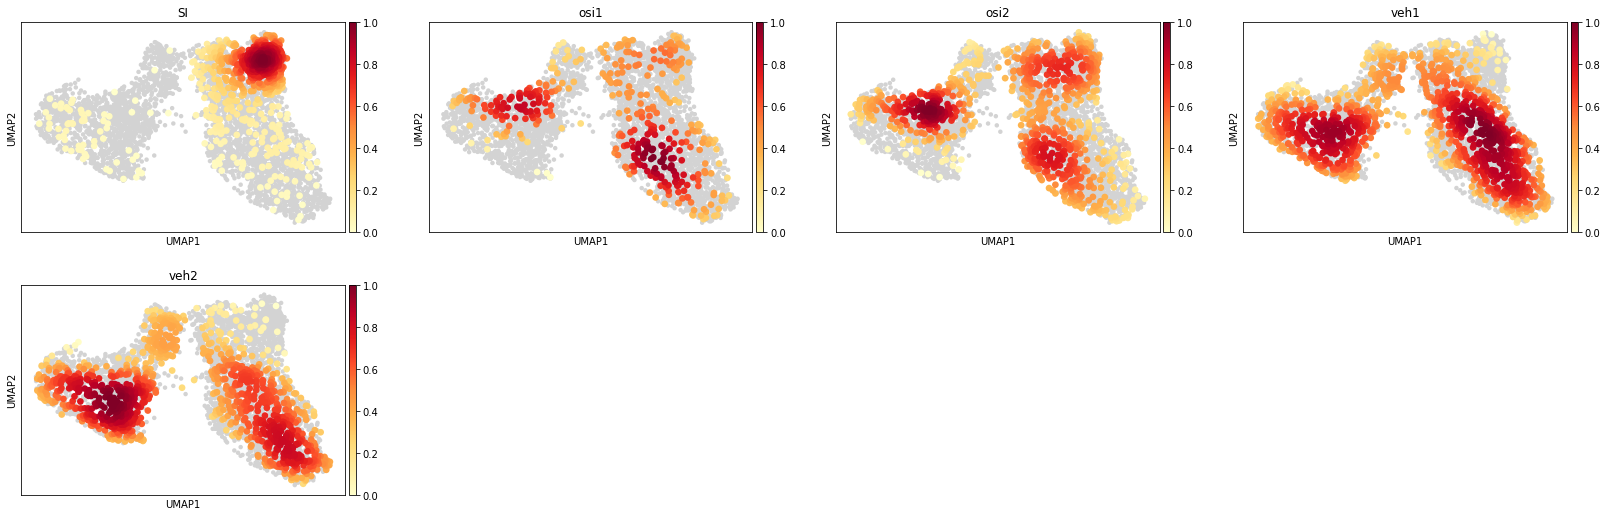

In [9]:
###default key is sample
sceasy.densitymap(clean)

# save data

In [10]:
sceasy.save(clean,'mytestfile')